# Bik-Sharing- Assignment
## Problem Statement
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [711]:
# Libraries required for EDA and build LinearRegression Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# scikit libraries

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [712]:
# reading data from local system and storing in dataframe

df=pd.read_csv('day.csv')
pd.set_option('display.max_columns',20)
print(df.head())
print(df.info())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

Finding
1. 730 rows and 16 columns
2. 4 variables are numeric type is float
3. 11 variables are integer and categorical further to how to treat 
4. one variable found to be object 

In [713]:
# data info Non-null counts display out of out data points which indicates doesn't have value 
# in percentage

round((df.isnull().sum()/len(df))*100,2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [714]:
# Row wise count percentage

round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)


0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### Finding 

There is no Null values either columns or rows wise

In [715]:
# TO find any junk or unknown values for the entire data frame

# "instant" columns seems to be unique which also similar to index of Dataset

dfun=df.drop('instant',axis=1)

dfun=dfun.select_dtypes(include='int64')

for col in dfun:
    print(dfun[col].value_counts(ascending=False), '\n\n\n')

3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64 



4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64 



5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: cnt, Length: 695, dtype: int64 





In [828]:
df.workingday.value_counts(normalize=True)

1    0.683562
0    0.316438
Name: workingday, dtype: float64

In [716]:
dfunf=df.select_dtypes(include=float)

for col in dfunf:
    print(dfunf[col].head(),'\n\n\n')

0    14.110847
1    14.902598
2     8.050924
3     8.200000
4     9.305237
Name: temp, dtype: float64 



0    18.18125
1    17.68695
2     9.47025
3    10.60610
4    11.46350
Name: atemp, dtype: float64 



0    80.5833
1    69.6087
2    43.7273
3    59.0435
4    43.6957
Name: hum, dtype: float64 



0    10.749882
1    16.652113
2    16.636703
3    10.739832
4    12.522300
Name: windspeed, dtype: float64 





### Removing unwanted columns from main dataframe

Below columns are dropped

1. 'instant' which is redudant as index of data set
2. 'dteday' which is derived as 'yr' and 'mnth' columns
3. Both 'casual' and 'registered' columns is addition form new column 'cnt'

Create a New Data frame

In [717]:

fdf=df.drop(columns=['instant','dteday','casual','registered'])

fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Create new dummy variable which has more than two levels

So we have 4 columns above two from the insights of Dataset

1. season
2. mnth
3. weekday
4. weather

Before creating lets convert them to categorical


In [718]:
c=['season','mnth','workingday','weathersit']
fdf[c]=fdf[c].astype('category')

In [719]:
fdf['workingday']=fdf['workingday'].astype('int64')
fdf['weekday']=fdf['weekday'].astype('category')

In [720]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


#### Creating new dummy variable which are having more two values and renaming as mentioned problem statment

In [721]:
fdf['season']=fdf.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
fdf.season.value_counts()
fdf['mnth']=fdf.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
fdf.value_counts()
fdf['weekday']=fdf.weekday.map({0:'mon',1:'tue',2:'wed',3:'thur',4:'fri',5:'sat',6:'sun'})
fdf.weekday.value_counts()
fdf['weathersit']=fdf.weathersit.map({1:'clear',2:'cloudy',3:'lightrain',4:'heavyrain'})
fdf.weathersit.value_counts()




clear        463
cloudy       246
lightrain     21
Name: weathersit, dtype: int64

In [722]:
c1=['season','mnth','weekday','weathersit']
fdf1=pd.get_dummies(fdf[c1], drop_first=True)
fdf1

,season_summer,season_fall,season_winter,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,...,mnth_nov,mnth_dec,weekday_tue,weekday_wed,weekday_thur,weekday_fri,weekday_sat,weekday_sun,weathersit_cloudy,weathersit_lightrain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
726,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
727,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
728,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [723]:
fdf=pd.concat([fdf,fdf1],axis=1)
fdf.shape

(730, 34)

#### Drop the columns for which we have created dummy variables

In [724]:
fdf=fdf.drop(columns=['season','mnth','weekday','weathersit'])
fdf.shape

(730, 30)

In [725]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_summer         730 non-null    uint8  
 9   season_fall           730 non-null    uint8  
 10  season_winter         730 non-null    uint8  
 11  mnth_feb              730 non-null    uint8  
 12  mnth_mar              730 non-null    uint8  
 13  mnth_apr              730 non-null    uint8  
 14  mnth_may              730 non-null    uint8  
 15  mnth_jun              7

## EDA : Exploratory data analysis

seems that following will visulaize based on categorical and numerical vaiables

<Figure size 2000x1600 with 0 Axes>

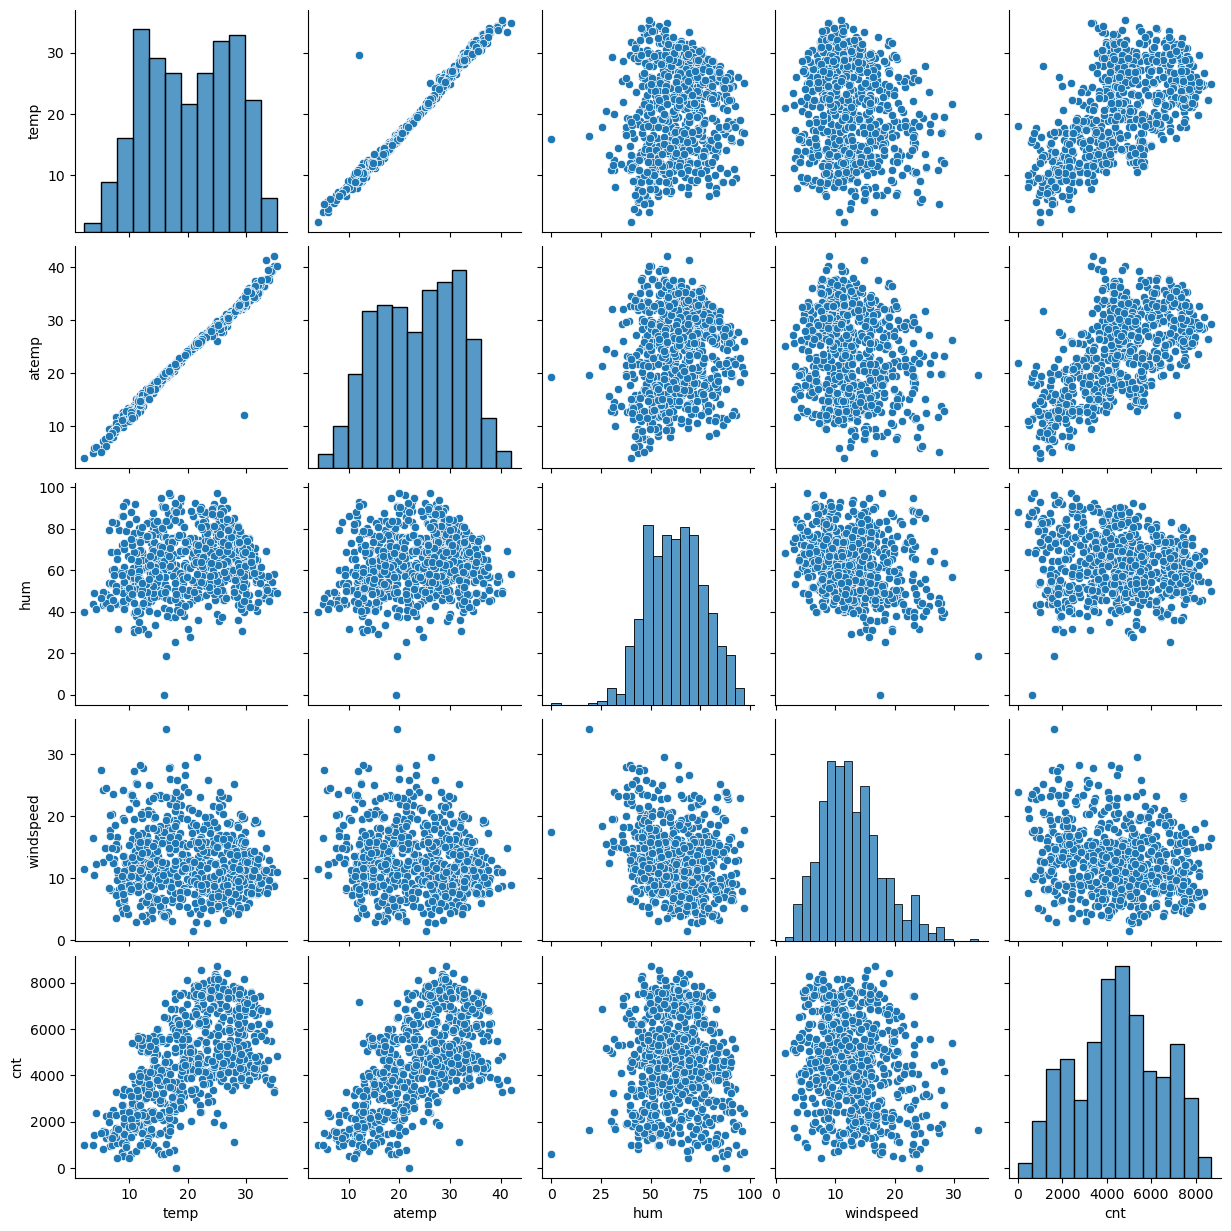

In [726]:
num_var=['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(20,16))
sns.pairplot(fdf[num_var])

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt

####
## As we 7 categorical varibales & effects target variable 'cnt'

<Axes: xlabel='weathersit', ylabel='cnt'>

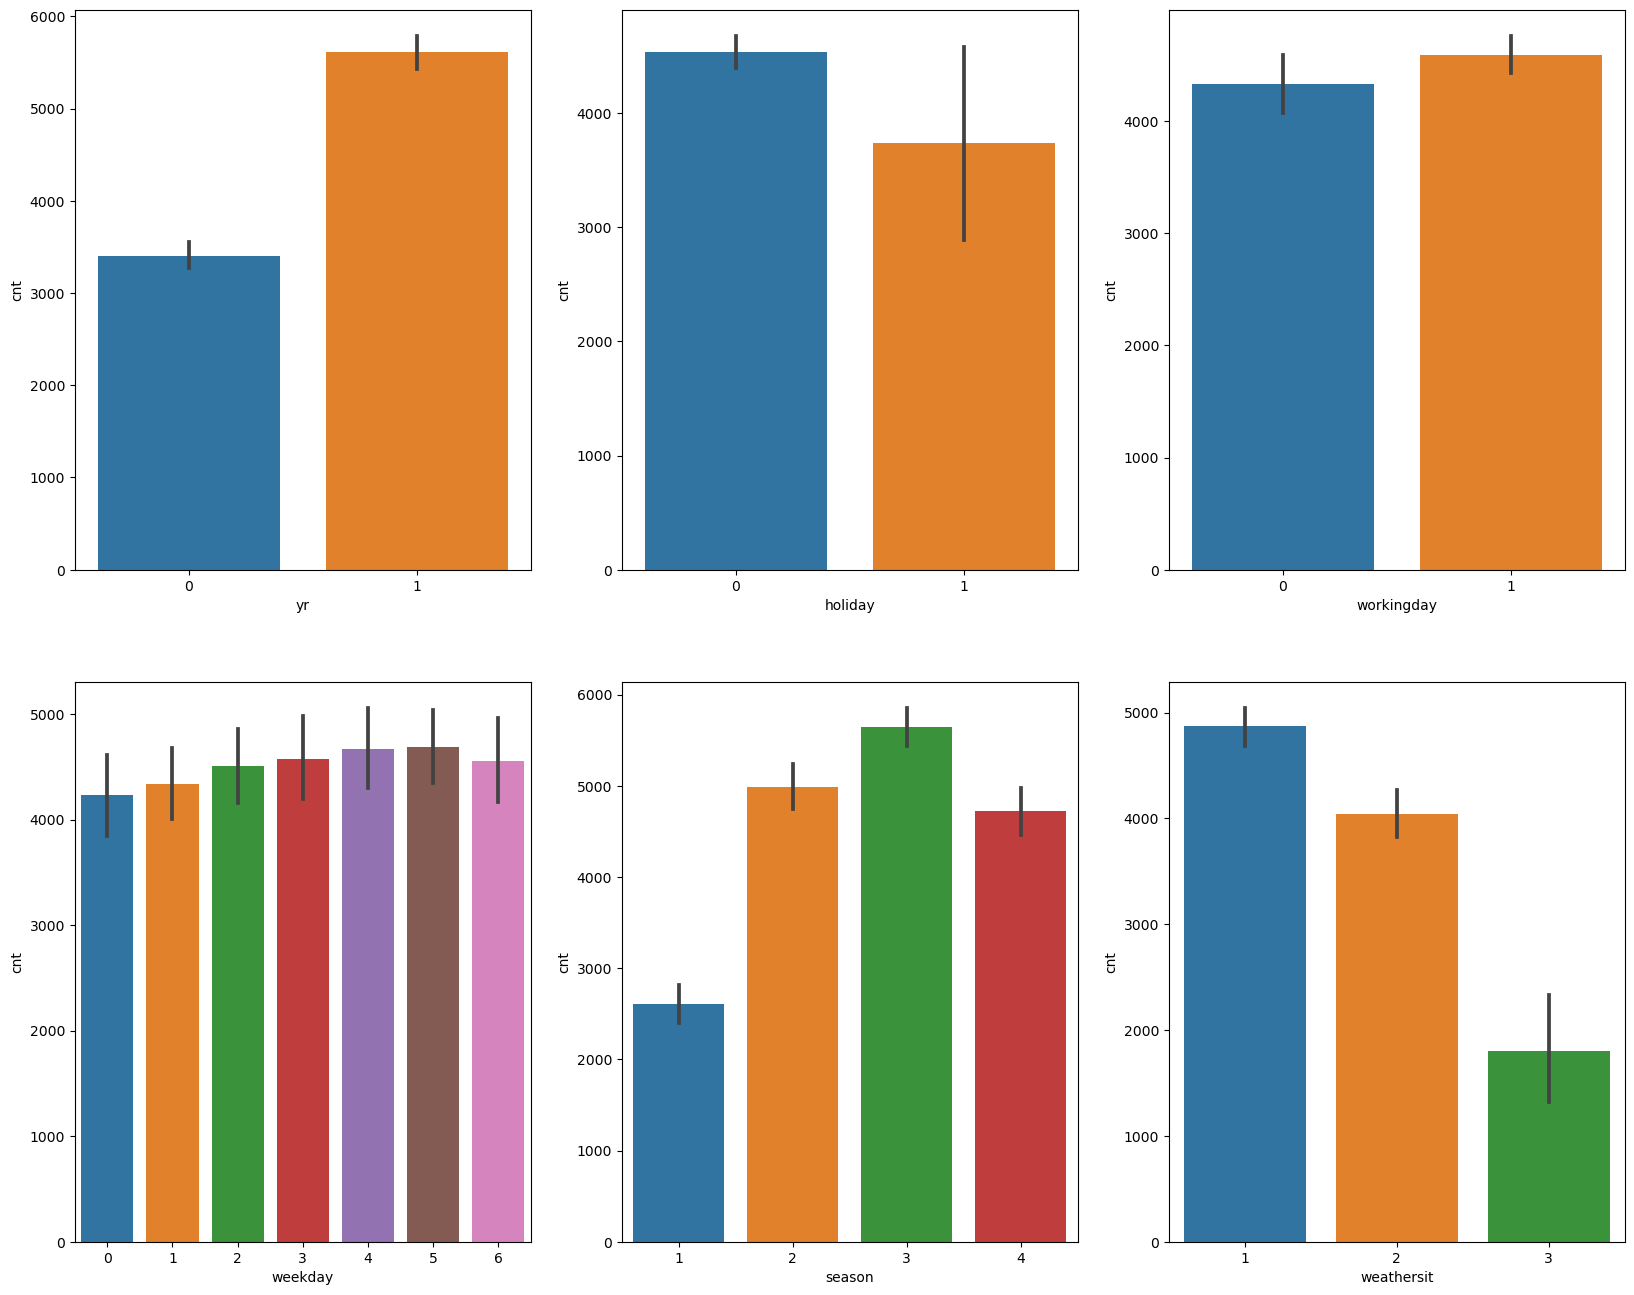

In [824]:
# Categorical variables
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.barplot(data=df,y='cnt',x='yr')
plt.subplot(2,3,2)
sns.barplot(data=df,y='cnt',x='holiday')
plt.subplot(2,3,3)
sns.barplot(data=df,y='cnt',x='workingday')
plt.subplot(2,3,4)
sns.barplot(data=df,y='cnt',x='weekday')
plt.subplot(2,3,5)
sns.barplot(data=df,y='cnt',x='season')
plt.subplot(2,3,6)
sns.barplot(data=df,y='cnt',x='weathersit')

In [832]:

a=['yr','season','holiday','weekday','workingday','mnth','weathersit']
dfc=df[a]

for col in dfc:
    print(dfc[col].value_counts(normalize=True,ascending=False), '\n\n\n')

0    0.5
1    0.5
Name: yr, dtype: float64 



3    0.257534
2    0.252055
1    0.246575
4    0.243836
Name: season, dtype: float64 



0    0.971233
1    0.028767
Name: holiday, dtype: float64 



6    0.143836
0    0.143836
1    0.143836
2    0.142466
4    0.142466
5    0.142466
3    0.141096
Name: weekday, dtype: float64 



1    0.683562
0    0.316438
Name: workingday, dtype: float64 



1     0.084932
3     0.084932
5     0.084932
7     0.084932
8     0.084932
10    0.084932
12    0.084932
4     0.082192
6     0.082192
9     0.082192
11    0.082192
2     0.076712
Name: mnth, dtype: float64 



1    0.634247
2    0.336986
3    0.028767
Name: weathersit, dtype: float64 





<Axes: xlabel='weathersit', ylabel='cnt'>

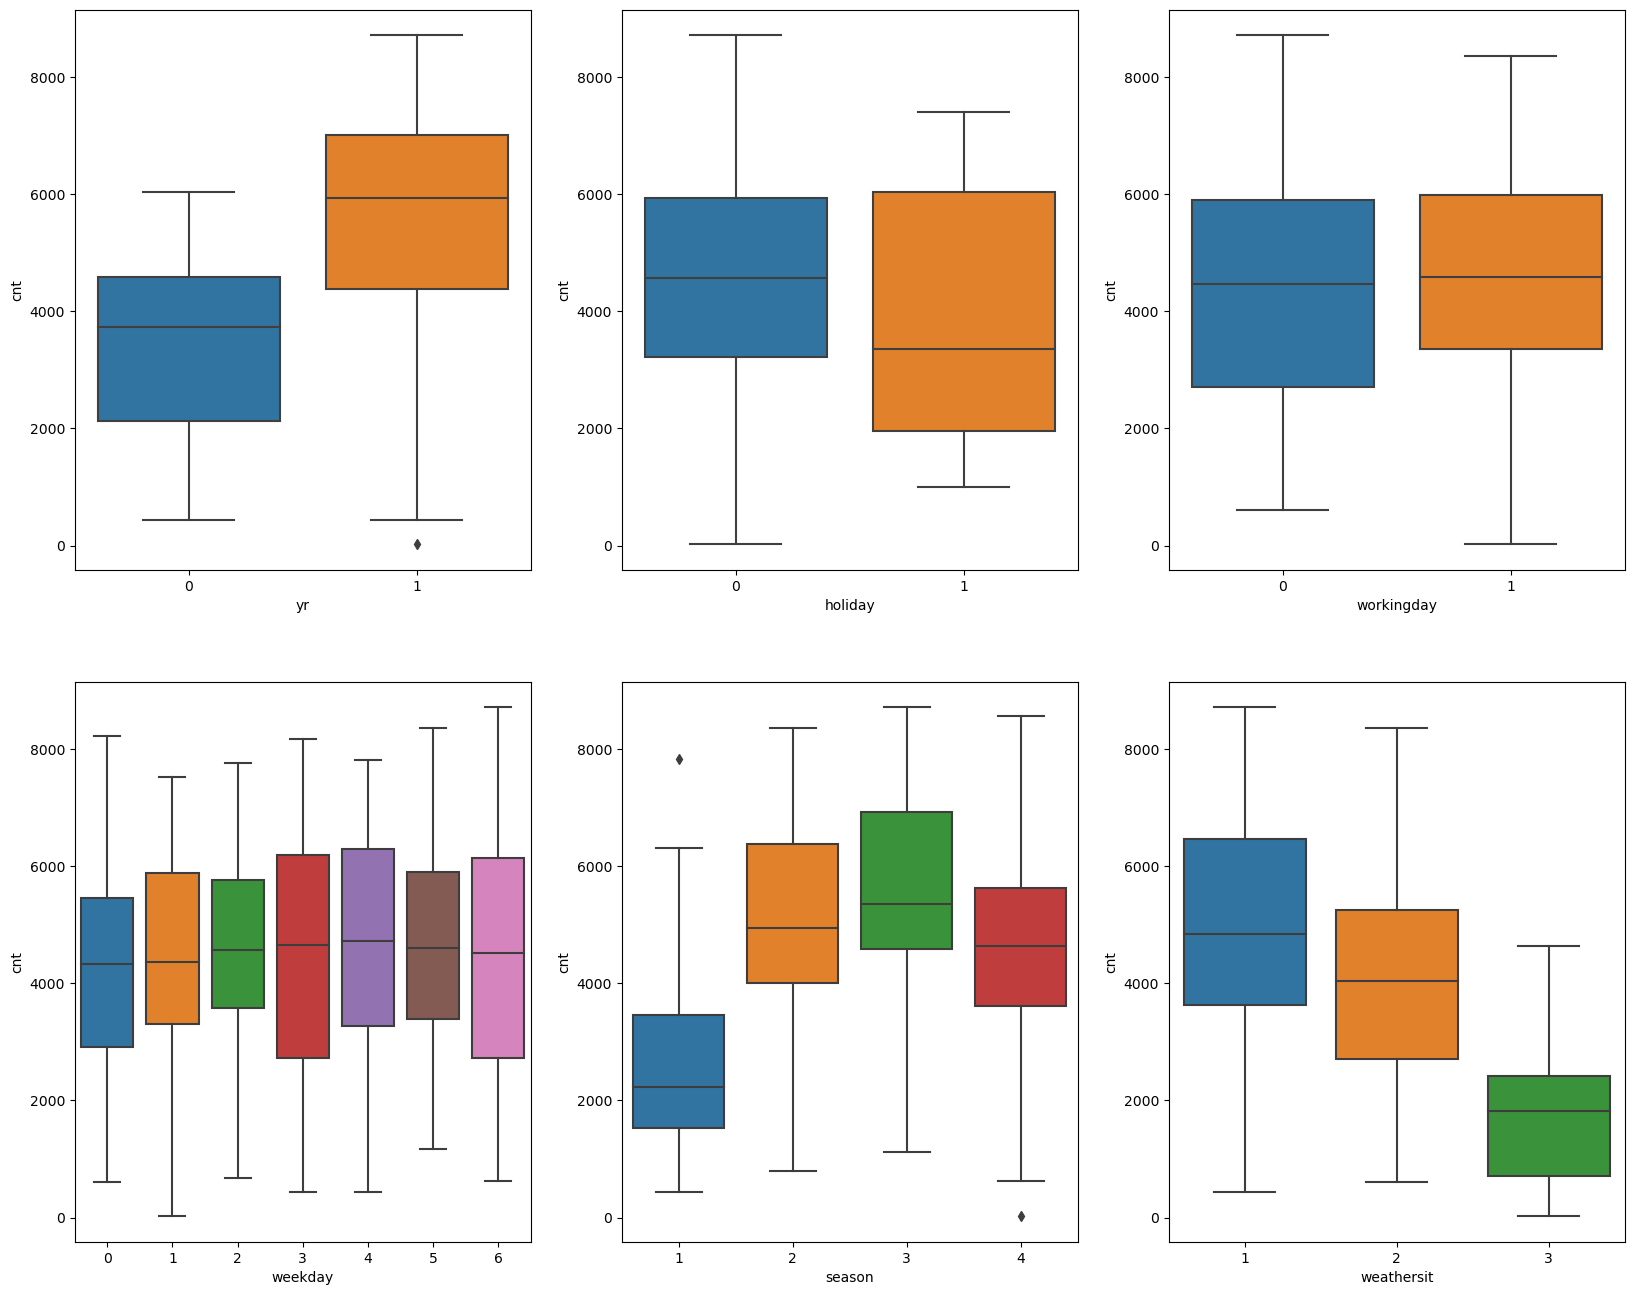

In [823]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df,y='cnt',x='yr')
plt.subplot(2,3,2)
sns.boxplot(data=df,y='cnt',x='holiday')
plt.subplot(2,3,3)
sns.boxplot(data=df,y='cnt',x='workingday')
plt.subplot(2,3,4)
sns.boxplot(data=df,y='cnt',x='weekday')
plt.subplot(2,3,5)
sns.boxplot(data=df,y='cnt',x='season')
plt.subplot(2,3,6)
sns.boxplot(data=df,y='cnt',x='weathersit')

<Axes: xlabel='mnth', ylabel='cnt'>

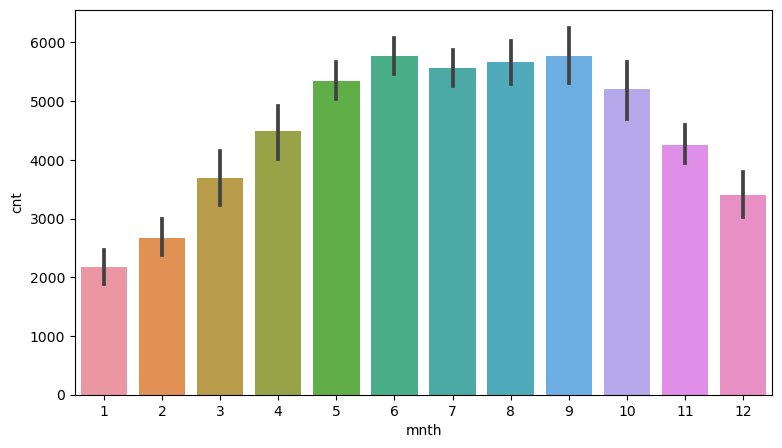

In [834]:
plt.figure(figsize=(9,5))
sns.barplot(data=df,y='cnt',x='mnth')

<Axes: xlabel='count', ylabel='col_bin'>

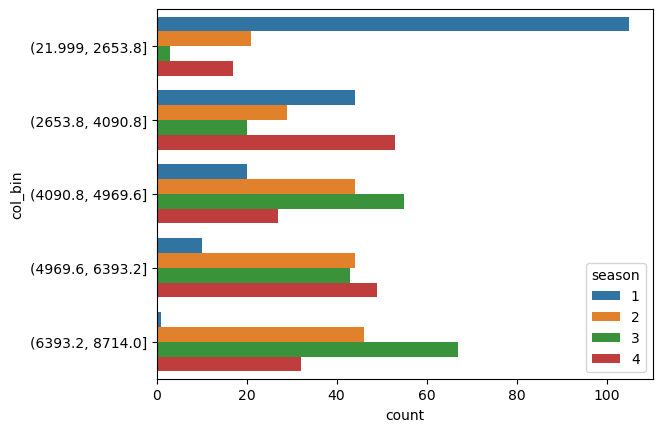

In [729]:
df1=df.copy()
bins=[]
df1['col_bin']=pd.qcut(df['cnt'],q=(0,0.2,0.4,0.6,0.8,1.))#,labels=['0-1999','2000-3999','4000-5999','6000-7999','8000-9999'])
sns.countplot(data=df1,y='col_bin',hue='season')

<Axes: xlabel='count', ylabel='col_bin'>

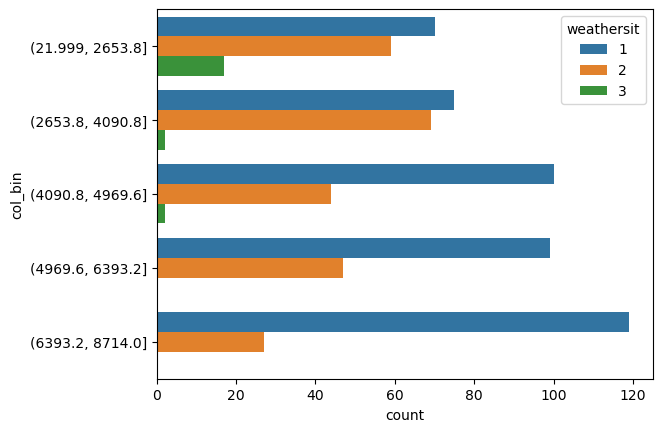

In [730]:
sns.countplot(data=df1,y='col_bin',hue='weathersit')

## Insights

- ‘yr’: as inferred from the above boxplot we can say that 2018 & 2019 year by year bookings are gradually increasing. Can be used as good predictor 
- ‘holiday’: bike bookings are maximum during non-holidays showing high median and holiday may not be considered as good predictor variable 
- ‘workingday’: 68 % percent booking done in working day for the period of two years can be good predictor 
- ’weekday’: weekday variable shows very close trend for all week days having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. 
- ‘season’: the bike max booking happening in season-fall with a median of over 5000 booking (for the period of 2 years), next followed by season-summer & season-winter of total booking. This indicates, season can be a good predictor for the dependent variable. 
- ‘weathersit’: 63% of the bike booking were happened during weathersit-clear with a median of close to 5000 booking (for the period of 2 years), next followed by weathersit-mistcloudy with 33% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the target variable.
- ‘mnth’: month 5,6,7,8,9 & 10 are highest number of bookings can be good predictor for target variable.

In [731]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_summer         730 non-null    uint8  
 9   season_fall           730 non-null    uint8  
 10  season_winter         730 non-null    uint8  
 11  mnth_feb              730 non-null    uint8  
 12  mnth_mar              730 non-null    uint8  
 13  mnth_apr              730 non-null    uint8  
 14  mnth_may              730 non-null    uint8  
 15  mnth_jun              7

## Splitting the data as train and test for ratio 70:30

In [732]:
# using library from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(fdf,train_size=0.70,random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Rescalling the feature

In [733]:
# from sklearn.preprocessing import MinMAxScaler for Rescalling the features

num_var=['temp','atemp','hum','windspeed','cnt']

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df_train[num_var]=scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_tue,weekday_wed,weekday_thur,weekday_fri,weekday_sat,weekday_sun,weathersit_cloudy,weathersit_lightrain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


In [734]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_tue,weekday_wed,weekday_thur,weekday_fri,weekday_sat,weekday_sun,weathersit_cloudy,weathersit_lightrain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

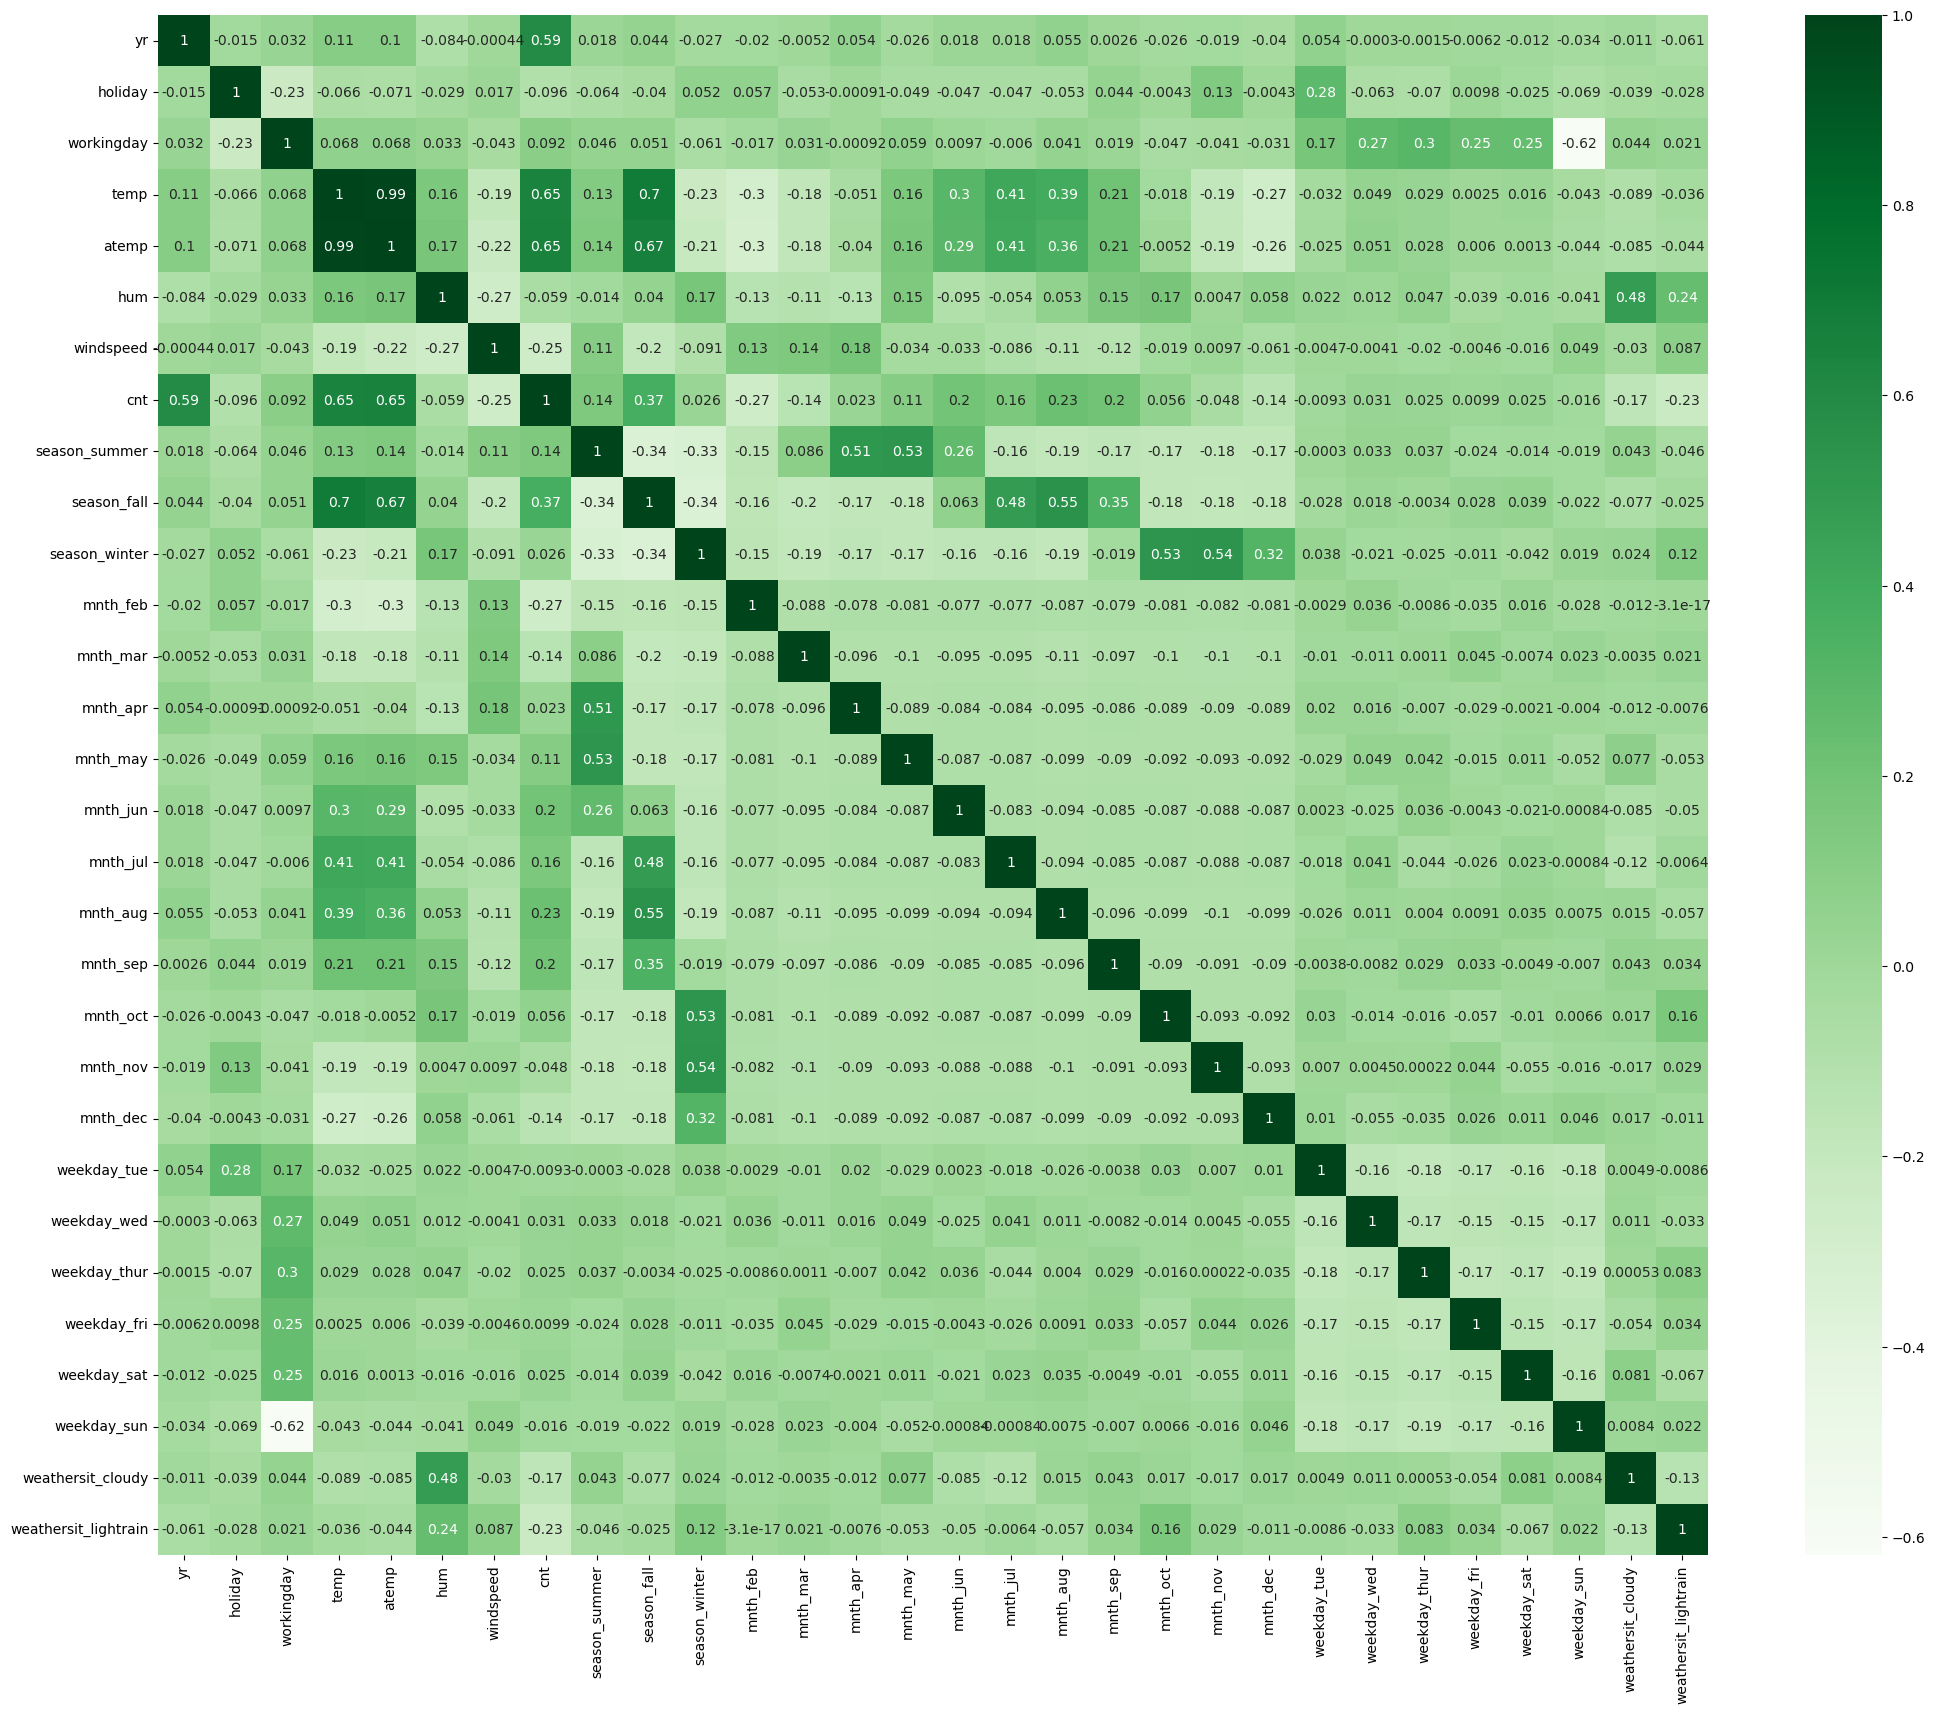

In [735]:
plt.figure(figsize=(25,20))
sns.heatmap(data=df_train.corr(),annot=True,cmap='Greens')

#### Insights:
- which variable have high collinearity with the target variable.
- We will refer this map while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

In [736]:
# As temp and atemp correlated with a value 0.99 which is high and better top drop the one column temp
# and the atemp is know as feeling temp so it is considered
df_train=df_train.drop(['temp'],axis=1)


In [737]:
print(df_train.head())
print(df_train.shape)

     yr  holiday  workingday     atemp       hum  windspeed       cnt  \
576   1        0           1  0.766351  0.725633   0.264686  0.827658   
426   1        0           0  0.438975  0.640189   0.255342  0.465255   
728   1        0           0  0.200348  0.498067   0.663106  0.204096   
482   1        0           0  0.391735  0.504508   0.188475  0.482973   
111   0        0           1  0.318819  0.751824   0.380981  0.191095   

     season_summer  season_fall  season_winter  ...  mnth_nov  mnth_dec  \
576              0            1              0  ...         0         0   
426              0            0              0  ...         0         0   
728              0            0              0  ...         0         1   
482              1            0              0  ...         0         0   
111              1            0              0  ...         0         0   

     weekday_tue  weekday_wed  weekday_thur  weekday_fri  weekday_sat  \
576            0            1        

## Splitting the columns as X_train & y_train

In [738]:
# our target variable is cnt so
print(df_train.shape)
y_train=df_train.pop('cnt')
x_train=df_train
x_train.shape

(510, 29)


(510, 28)

# RFE 
### with 18 features


In [739]:
#from sklearn.linear_model import LinearRegression
#from sklearn.feature_selection import RFE

### Linear Regression Model

In [740]:
lm=LinearRegression()
lm.fit(x_train,y_train)

rfe=RFE(estimator=lm, n_features_to_select=18)
rfe = rfe.fit(x_train,y_train)

In [741]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 4),
 ('mnth_mar', True, 1),
 ('mnth_apr', False, 2),
 ('mnth_may', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_jul', False, 3),
 ('mnth_aug', True, 1),
 ('mnth_sep', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 5),
 ('mnth_dec', False, 6),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 8),
 ('weekday_thur', False, 10),
 ('weekday_fri', False, 11),
 ('weekday_sat', False, 9),
 ('weekday_sun', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_lightrain', True, 1)]

In [742]:
col=x_train.columns[rfe.support_]
col.shape

(18,)

In [743]:
x_train.columns[~rfe.support_].shape

(10,)

# Using Statsmodels we check the metrics 

In [744]:
# Create a variable which has only rfe.support_ True 

x_train_rfe=x_train[col]

In [745]:
# adding constant for SM
x_train_con=sm.add_constant(x_train_rfe)

lm_model=sm.OLS(y_train,x_train_con).fit()

print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.92e-187
Time:                        01:23:15   Log-Likelihood:                 518.22
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     491   BIC:                            -918.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1946 

In [746]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,atemp,26.42
4,hum,18.19
7,season_fall,8.34
2,workingday,5.10
5,windspeed,3.99
6,season_summer,3.79
8,season_winter,3.17
16,weathersit_cloudy,2.16
0,yr,2.06
10,mnth_may,1.95


As we saw that holiday holds highest p-value of 0.094 > 0.05 which means to be insignificant
we drop the "holiday' column


In [747]:
x_train_rfe=x_train_rfe.drop('holiday',axis=1)


### Model 2


In [748]:
x_train_con1=sm.add_constant(x_train_rfe)

lm_model_1=sm.OLS(y_train,x_train_con1).fit()

print(lm_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.23e-187
Time:                        01:23:18   Log-Likelihood:                 516.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     492   BIC:                            -921.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1865 

In [749]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,atemp,26.38
3,hum,17.72
6,season_fall,8.32
1,workingday,4.61
4,windspeed,3.93
5,season_summer,3.79
7,season_winter,3.17
15,weathersit_cloudy,2.15
0,yr,2.06
9,mnth_may,1.95


#### seems that there is change in the value of VIF when drop the high p-value of holiday

### Model 2 
by dropping next high p-value i.e  'mnth_jun'

In [750]:
x_train_rfe=x_train_rfe.drop('mnth_jun', axis=1)

In [751]:
x_train_con2=sm.add_constant(x_train_rfe)

lm_model_2=sm.OLS(y_train,x_train_con2).fit()

print(lm_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.21e-188
Time:                        01:23:20   Log-Likelihood:                 514.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     493   BIC:                            -924.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1857 

In [752]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,atemp,23.32
3,hum,17.40
6,season_fall,8.22
1,workingday,4.61
4,windspeed,3.91
5,season_summer,3.70
7,season_winter,3.12
14,weathersit_cloudy,2.15
0,yr,2.05
10,mnth_aug,1.86


### Model 3
by dropping the high p-value variable 'mnth_may' greater than 0.05 < 0.061 

In [753]:
x_train_rfe=x_train_rfe.drop('mnth_may', axis=1)

In [754]:
x_train_con3=sm.add_constant(x_train_rfe)

lm_model_3=sm.OLS(y_train,x_train_con3).fit()

print(lm_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.21e-188
Time:                        01:23:22   Log-Likelihood:                 513.15
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     494   BIC:                            -926.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1793 

In [755]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,atemp,22.84
3,hum,17.32
6,season_fall,8.00
1,workingday,4.61
4,windspeed,3.85
5,season_summer,3.46
7,season_winter,3.07
13,weathersit_cloudy,2.14
0,yr,2.04
9,mnth_aug,1.86


### Model 4 
by dropping the variable having p-value 0.070>0.05 'mnth_mar'

In [756]:
x_train_rfe=x_train_rfe.drop('mnth_mar',axis=1)

In [757]:
x_train_con4=sm.add_constant(x_train_rfe)

lm_model_4=sm.OLS(y_train,x_train_con4).fit()

print(lm_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.09e-189
Time:                        01:23:24   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     495   BIC:                            -929.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1851 

In [758]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,atemp,22.70
3,hum,17.27
6,season_fall,7.66
1,workingday,4.56
4,windspeed,3.79
5,season_summer,3.38
7,season_winter,2.86
12,weathersit_cloudy,2.14
0,yr,2.04
8,mnth_aug,1.86


### Model 5 
dropping 'season_fall' having p-value 0.019 > 0.05

In [759]:
x_train_rfe=x_train_rfe.drop('season_fall',axis=1)

In [760]:
x_train_con5=sm.add_constant(x_train_rfe)

lm_model_5=sm.OLS(y_train,x_train_con5).fit()

print(lm_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.76e-189
Time:                        01:23:26   Log-Likelihood:                 508.60
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1840 

In [761]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,16.40
2,atemp,10.09
1,workingday,4.56
4,windspeed,3.76
6,season_winter,2.23
11,weathersit_cloudy,2.13
0,yr,2.03
5,season_summer,1.84
10,weekday_sun,1.79
9,mnth_oct,1.60


### Model 6 
by dropping variable 'mnth_oct' having p-value 0.023 

In [762]:
x_train_rfe=x_train_rfe.drop('mnth_oct', axis=1)

In [763]:
x_train_con6=sm.add_constant(x_train_rfe)

lm_model_6=sm.OLS(y_train,x_train_con6).fit()

print(lm_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.65e-189
Time:                        01:23:29   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1769 

In [764]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,16.36
2,atemp,9.83
1,workingday,4.54
4,windspeed,3.76
10,weathersit_cloudy,2.13
0,yr,2.02
5,season_summer,1.83
9,weekday_sun,1.79
6,season_winter,1.74
7,mnth_aug,1.55


### After dropping varibales having p-values, now will check the Multicollinearty values of having VIF more than 5.
#### So we drop first variable having VIF 16.36>5 i.e 'hum'

### Model 7

In [765]:
x_train_rfe=x_train_rfe.drop('hum',axis=1)

In [766]:
x_train_con7=sm.add_constant(x_train_rfe)

lm_model_7=sm.OLS(y_train,x_train_con7).fit()

print(lm_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          9.15e-186
Time:                        01:23:32   Log-Likelihood:                 495.82
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     498   BIC:                            -916.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0779 

In [767]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,atemp,6.02
1,workingday,4.06
3,windspeed,3.45
0,yr,2.02
4,season_summer,1.83
8,weekday_sun,1.69
6,mnth_aug,1.55
9,weathersit_cloudy,1.54
5,season_winter,1.52
7,mnth_sep,1.30


### We drop mnth_aug because as we have one variabel which has same counts but low VIF value. But 'atemp' cannot be dropped as it important predictor 

In [819]:
x_train_rfe=x_train_rfe.drop('mnth_aug',axis=1)

In [820]:
x_train_con8=sm.add_constant(x_train_rfe)

lm_model_8=sm.OLS(y_train,x_train_con8).fit()

print(lm_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.14e-183
Time:                        02:01:03   Log-Likelihood:                 488.01
No. Observations:                 510   AIC:                            -954.0
Df Residuals:                     499   BIC:                            -907.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0711 

In [821]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,atemp,4.81
1,workingday,4.06
3,windspeed,3.41
0,yr,2.02
7,weekday_sun,1.69
4,season_summer,1.58
8,weathersit_cloudy,1.53
5,season_winter,1.40
6,mnth_sep,1.20
9,weathersit_lightrain,1.08


### Insights
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. Lets build another model by decreasing the features to 14

## Model RFE for 15 features

In [768]:
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

lm1=LinearRegression()
lm1.fit(x_train,y_train)

rfe=RFE(estimator=lm1, n_features_to_select=14)
rfe = rfe.fit(x_train,y_train)

In [769]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_mar', False, 4),
 ('mnth_apr', False, 6),
 ('mnth_may', False, 3),
 ('mnth_jun', False, 5),
 ('mnth_jul', False, 7),
 ('mnth_aug', True, 1),
 ('mnth_sep', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_nov', False, 9),
 ('mnth_dec', False, 10),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 12),
 ('weekday_thur', False, 14),
 ('weekday_fri', False, 15),
 ('weekday_sat', False, 13),
 ('weekday_sun', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_lightrain', True, 1)]

In [770]:
col1=x_train.columns[rfe.support_]
print(col.shape)
col

(18,)


Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_mar', 'mnth_may',
       'mnth_jun', 'mnth_aug', 'mnth_sep', 'mnth_oct', 'weekday_sun',
       'weathersit_cloudy', 'weathersit_lightrain'],
      dtype='object')

In [771]:
x_train_rfe1=x_train[col]
x_train_rfe1

,yr,holiday,workingday,atemp,hum,windspeed,season_summer,season_fall,season_winter,mnth_mar,mnth_may,mnth_jun,mnth_aug,mnth_sep,mnth_oct,weekday_sun,weathersit_cloudy,weathersit_lightrain
576,1,0,1,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,1,0,0,0,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,1,0,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.318819,0.751824,0.380981,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.824359,0.679690,0.187140,0,1,0,0,0,0,1,0,0,0,0,0
53,0,0,1,0.218747,0.435939,0.111379,0,0,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.223544,0.577930,0.431816,0,0,1,0,0,0,0,0,0,1,1,0
79,0,0,1,0.434043,0.759870,0.529881,1,0,0,1,0,0,0,0,0,0,1,0


In [772]:
x_train_con=sm.add_constant(x_train_rfe1)

lm_model_11=sm.OLS(y_train,x_train_con).fit()

print(lm_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.92e-187
Time:                        01:23:37   Log-Likelihood:                 518.22
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     491   BIC:                            -918.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1946 

In [773]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
3,atemp,26.42
4,hum,18.19
7,season_fall,8.34
2,workingday,5.10
5,windspeed,3.99
6,season_summer,3.79
8,season_winter,3.17
16,weathersit_cloudy,2.16
0,yr,2.06
10,mnth_may,1.95


## Model 2

In [774]:
x_train_rfe1=x_train_rfe1.drop('holiday',axis=1)
x_train_rfe1.shape

(510, 17)

In [775]:
x_train_con12=sm.add_constant(x_train_rfe1)

lm_model_12=sm.OLS(y_train,x_train_con12).fit()

print(lm_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.23e-187
Time:                        01:23:38   Log-Likelihood:                 516.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     492   BIC:                            -921.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1865 

In [776]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
2,atemp,26.38
3,hum,17.72
6,season_fall,8.32
1,workingday,4.61
4,windspeed,3.93
5,season_summer,3.79
7,season_winter,3.17
15,weathersit_cloudy,2.15
0,yr,2.06
9,mnth_may,1.95


## Model 3

In [777]:
x_train_rfe1=x_train_rfe1.drop('mnth_jun',axis=1)
x_train_rfe1.shape

(510, 16)

In [778]:
x_train_con13=sm.add_constant(x_train_rfe1)

lm_model_13=sm.OLS(y_train,x_train_con13).fit()

print(lm_model_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.21e-188
Time:                        01:23:40   Log-Likelihood:                 514.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     493   BIC:                            -924.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1857 

In [779]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
2,atemp,23.32
3,hum,17.40
6,season_fall,8.22
1,workingday,4.61
4,windspeed,3.91
5,season_summer,3.70
7,season_winter,3.12
14,weathersit_cloudy,2.15
0,yr,2.05
10,mnth_aug,1.86


## Model 4

In [780]:
x_train_rfe1=x_train_rfe1.drop(columns=['mnth_may'])
x_train_rfe1.shape

(510, 15)

In [781]:
x_train_con14=sm.add_constant(x_train_rfe1)

lm_model_14=sm.OLS(y_train,x_train_con14).fit()

print(lm_model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.21e-188
Time:                        01:23:42   Log-Likelihood:                 513.15
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     494   BIC:                            -926.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1793 

In [782]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
2,atemp,22.84
3,hum,17.32
6,season_fall,8.00
1,workingday,4.61
4,windspeed,3.85
5,season_summer,3.46
7,season_winter,3.07
13,weathersit_cloudy,2.14
0,yr,2.04
9,mnth_aug,1.86


## Model 5

In [783]:
x_train_rfe1=x_train_rfe1.drop(columns=['mnth_mar'])
x_train_rfe1.shape

(510, 14)

In [784]:
x_train_con15=sm.add_constant(x_train_rfe1)

lm_model_15=sm.OLS(y_train,x_train_con15).fit()

print(lm_model_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.09e-189
Time:                        01:23:45   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     495   BIC:                            -929.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1851 

In [785]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
2,atemp,22.70
3,hum,17.27
6,season_fall,7.66
1,workingday,4.56
4,windspeed,3.79
5,season_summer,3.38
7,season_winter,2.86
12,weathersit_cloudy,2.14
0,yr,2.04
8,mnth_aug,1.86


## Model 6

In [786]:
x_train_rfe1=x_train_rfe1.drop(columns=['season_fall'])
x_train_rfe1.shape

(510, 13)

In [787]:
x_train_con16=sm.add_constant(x_train_rfe1)

lm_model_16=sm.OLS(y_train,x_train_con16).fit()

print(lm_model_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.76e-189
Time:                        01:23:47   Log-Likelihood:                 508.60
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1840 

In [788]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
3,hum,16.40
2,atemp,10.09
1,workingday,4.56
4,windspeed,3.76
6,season_winter,2.23
11,weathersit_cloudy,2.13
0,yr,2.03
5,season_summer,1.84
10,weekday_sun,1.79
9,mnth_oct,1.60


## Model 7

In [789]:
x_train_rfe1=x_train_rfe1.drop(columns=['mnth_oct'])
x_train_rfe1.shape

(510, 12)

In [790]:
x_train_con17=sm.add_constant(x_train_rfe1)

lm_model_17=sm.OLS(y_train,x_train_con17).fit()

print(lm_model_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.65e-189
Time:                        01:23:50   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1769 

In [791]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
3,hum,16.36
2,atemp,9.83
1,workingday,4.54
4,windspeed,3.76
10,weathersit_cloudy,2.13
0,yr,2.02
5,season_summer,1.83
9,weekday_sun,1.79
6,season_winter,1.74
7,mnth_aug,1.55


## Model 8

In [792]:
x_train_rfe1=x_train_rfe1.drop(columns=['hum'])
x_train_rfe1.shape

(510, 11)

In [793]:
x_train_con18=sm.add_constant(x_train_rfe1)

lm_model_18=sm.OLS(y_train,x_train_con18).fit()

print(lm_model_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          9.15e-186
Time:                        01:23:58   Log-Likelihood:                 495.82
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     498   BIC:                            -916.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0779 

In [794]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,6.02
1,workingday,4.06
3,windspeed,3.45
0,yr,2.02
4,season_summer,1.83
8,weekday_sun,1.69
6,mnth_aug,1.55
9,weathersit_cloudy,1.54
5,season_winter,1.52
7,mnth_sep,1.30


### As we observe the mnth_aug and mnth_sep are having almost same number of counts so one can dropped which 'mnth_aug' has VIF value compared to 'mnth_sep' 

In [795]:
x_train_rfe1=x_train_rfe1.drop(columns=['mnth_aug'])
x_train_rfe1.shape

(510, 10)

## Model 9

In [796]:
x_train_con19=sm.add_constant(x_train_rfe1)

lm_model_19=sm.OLS(y_train,x_train_con19).fit()

print(lm_model_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.14e-183
Time:                        01:24:02   Log-Likelihood:                 488.01
No. Observations:                 510   AIC:                            -954.0
Df Residuals:                     499   BIC:                            -907.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0711 

In [797]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,4.81
1,workingday,4.06
3,windspeed,3.41
0,yr,2.02
7,weekday_sun,1.69
4,season_summer,1.58
8,weathersit_cloudy,1.53
5,season_winter,1.40
6,mnth_sep,1.20
9,weathersit_lightrain,1.08


In [798]:
print(lm_model_19.params)

const                   0.071087
yr                      0.234208
workingday              0.056319
atemp                   0.577926
windspeed              -0.137310
season_summer           0.082660
season_winter           0.122011
mnth_sep                0.098461
weekday_sun             0.067539
weathersit_cloudy      -0.080566
weathersit_lightrain   -0.281250
dtype: float64


F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 240.5
- Prob (F-statistic): 1.14e-183

The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significan

### The best fitted plane based on lm_model_19

- cnt = 0.071087 + (yr × 0.234208) + (workingday × 0.056319) + (atemp × 0.577926) − (windspeed × 0.137310) + (season_summer × 0.082660) + (season_winter × 0.122011) + (mnth_sep × 0.098461) + (weekday_sun × 0.067539) − (weathersit_cloudy × 0.080566) − (weathersit_lighttrain × 0.281250)


Interpretation of Coefficients:

- atemp: A coefficient value of ‘0.5779’ indicated that a unit increase in atemp variable, increases the bike hire numbers by 0.5779 units.

- weathersit_lightrain: A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit_lightrain, a unit increase in Weathersit-lightrain variable, decreases the bike hire numbers by 0.3070 units.


- yr: A coefficient value of ‘0.2342’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2342 units.

- season_winter: A coefficient value of ‘0.122011’ indicated that w.r.t season_winter, a unit increase in season_winter variable increases the bike hire numbers by 0.122011 units.

- windspeed: A coefficient value of ‘-0.137310’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by -0.137310 units.

- workingday: A coefficient value of ‘0.056319’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.056319 units.

- season_summer: A coefficient value of ‘0.082660’ indicated that w.r.t season_summer, a unit increase in season_summer variable increases the bike hire numbers by  units.

- mnth_sep: A coefficient value of ‘0.098461’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.098461 units.

- weathersit_cloudy: A coefficient value of ‘-0.080566’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.080566 units.

- const: The Constant value of ‘0.071087’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike hire can still increase by 0.071807 units.

#
## Residual analysis for the x_train data

### to check whether errors are normally distributed which is major assumptions of linear regression

In [799]:
y_train_predict=lm_model_19.predict(x_train_con19)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

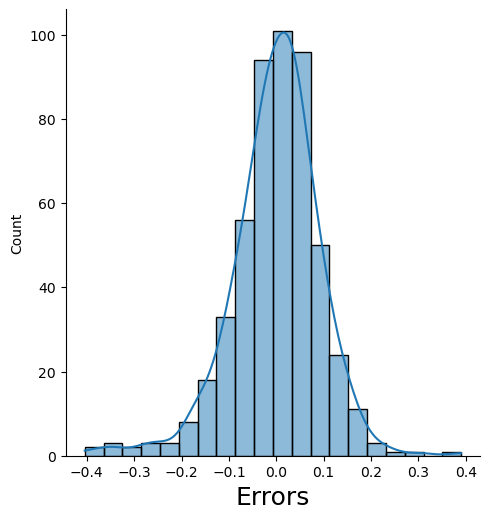

In [800]:
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.displot((y_train - y_train_predict), bins = 20,kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Making prediction on test from final model

In [801]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_tue,weekday_wed,weekday_thur,weekday_fri,weekday_sat,weekday_sun,weathersit_cloudy,weathersit_lightrain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


In [802]:

    

num_var1=['temp','atemp','hum','windspeed','cnt']

df_test[num_var1]=scaler.transform(df_test[num_var1])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_tue,weekday_wed,weekday_thur,weekday_fri,weekday_sat,weekday_sun,weathersit_cloudy,weathersit_lightrain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [803]:
df_test.shape
df_test1=df_test.copy()
df_test1.shape

(220, 30)

## Splitting the data x_test and y_test

In [804]:
y_test=df_test.pop('cnt')
x_test=df_test
print(y_test.head())
print(x_test.head())

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64
     yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

     season_summer  season_fall  season_winter  ...  mnth_nov  mnth_dec  \
184              0            1              0  ...         0         0   
535              1            0              0  ...         0         0   
299              0            0              1  ...         0         0   
221              0            1              0  ...         0         0   
152              1            0              0  ...         0         0   

    

In [808]:
col2=x_train_rfe1.columns
x_test1=x_test[col2]
x_test1.head()

,yr,workingday,atemp,windspeed,season_summer,season_winter,mnth_sep,weekday_sun,weathersit_cloudy,weathersit_lightrain
184,0,0,0.769660,0.084219,0,0,0,0,1,0
535,1,1,0.842587,0.153728,1,0,0,0,0,0
299,0,1,0.496145,0.334206,0,1,0,0,1,0
221,0,1,0.795343,0.339570,0,0,0,0,0,0
152,0,1,0.741471,0.537414,1,0,0,0,0,0


In [809]:
x_con_test=sm.add_constant(x_test1)

x_con_test.info()

# making prediction



<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 220 non-null    float64
 1   yr                    220 non-null    int64  
 2   workingday            220 non-null    int64  
 3   atemp                 220 non-null    float64
 4   windspeed             220 non-null    float64
 5   season_summer         220 non-null    uint8  
 6   season_winter         220 non-null    uint8  
 7   mnth_sep              220 non-null    uint8  
 8   weekday_sun           220 non-null    uint8  
 9   weathersit_cloudy     220 non-null    uint8  
 10  weathersit_lightrain  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [810]:
# Making prediction on final model

y_test_pred=lm_model_19.predict(x_con_test)

## Model evaluation


In [811]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

NameError: name 'y_pred' is not defined

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'y_test_pred')

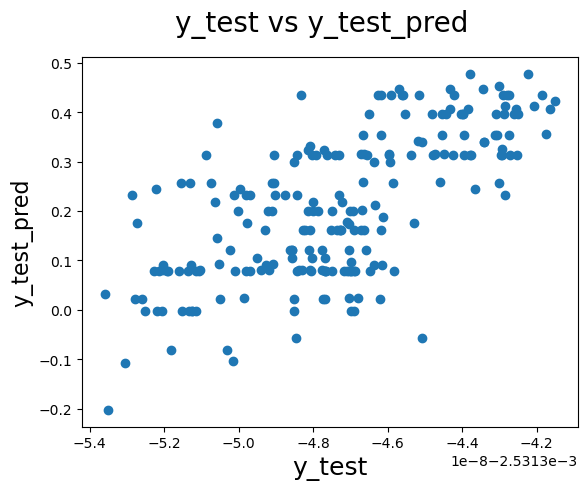

In [707]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   

In [812]:
from sklearn.metrics import r2_score


In [818]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7977452644716917

In [817]:
# n is number of rows in X

n = x_test1.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = x_test1.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.788068004398567

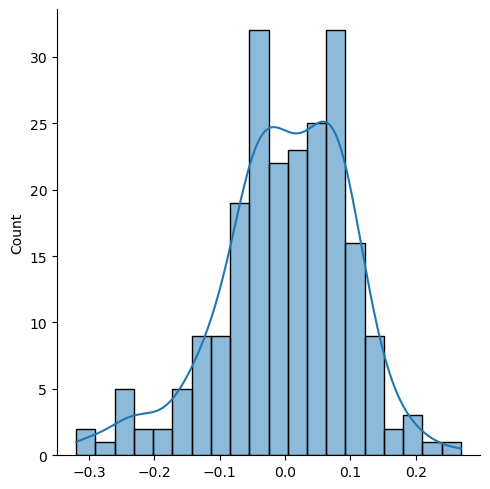

In [814]:
sns.displot(y_test-y_test_pred,kde=True,bins=20)

## Final Result Comparision
#### - Train Model R^2 :0.828
#### - Train Model Adjusted R^2 :0.825

#### - Test Model R^2 :0.7977
#### - Test Model Adjusted R^2 :0.7880
### This seems to be a really good model that can very well 'Generalize' various datasets.

### As per our final Model, the top 3 predictor variables that influences the bike booking are:

#### - 'atemp': A coefficient value of ‘0.5779’ indicated that a unit increase in atemp variable, increases the bike hire numbers by 0.5779 units.

#### - 'weathersit_lightrain': A coefficient value of ‘-0.3070’ indicated that, w.r.t weathersit_lightrain, a unit increase in weathersit_lightrain variable, decreases the bike hire numbers by 0.3070 units.

#### - 'yr': A coefficient value of ‘0.2342’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2342 units.

### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Bookings